# Seed-based FC


**Resources**

[Nilearn 9.4.6. Producing single subject maps of seed-to-voxel correlation](https://nilearn.github.io/auto_examples/03_connectivity/plot_seed_to_voxel_correlation.html#sphx-glr-auto-examples-03-connectivity-plot-seed-to-voxel-correlation-py)

[Nilearn: 9.5.4. Default Mode Network extraction of AHDH dataset](https://nilearn.github.io/auto_examples/04_glm_first_level/plot_adhd_dmn.html)

[FitLins](https://github.com/poldracklab/fitlins)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob


from nilearn import plotting

tr = 1.5  
n_scans = 164  
frame_times = np.arange(n_scans) * tr  

/usr/local/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
func_files = sorted(glob.glob('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-*/func/sub-*_task-MemMatch[1-3]_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'))
func_files[:5]

['/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch1_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch2_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch3_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30008/func/sub-30008_task-MemMatch1_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30008/func/sub-30008_task-MemMatch2_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']

In [3]:
subjects = [ func_file.split('sub-')[1][:5] for func_file in func_files]
subjects[:5]

['30004', '30004', '30004', '30008', '30008']

In [4]:
conf_files = sorted(glob.glob('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-*/func/sub-*_task-MemMatch[1-3]_run-01_desc-confounds_regressors.tsv'))
conf_files[:5]

['/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch1_run-01_desc-confounds_regressors.tsv',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch2_run-01_desc-confounds_regressors.tsv',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch3_run-01_desc-confounds_regressors.tsv',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30008/func/sub-30008_task-MemMatch1_run-01_desc-confounds_regressors.tsv',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30008/func/sub-30008_task-MemMatch2_run-01_desc-confounds_regressors.tsv']

## First level GLM

In [5]:
subject = '30004'
run = '1'

pd.read_csv('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-%s/func/sub-%s_task-MemMatch%s_run-01_desc-confounds_regressors.tsv' % (subject, subject, run), sep = '\t')

,csf,white_matter,global_signal,std_dvars,dvars,framewise_displacement,t_comp_cor_00,t_comp_cor_01,t_comp_cor_02,t_comp_cor_03,...,a_comp_cor_05,cosine00,cosine01,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,motion_outlier_00
0,8132.941465,8430.043355,10624.859048,NaN,NaN,NaN,-0.079709,-0.056285,0.046953,-0.103024,...,0.001296,0.110426,0.110411,4.920140e-03,0.038473,0.005280,0.001138,0.000214,0.000000e+00,0
1,8118.993240,8423.914560,10577.636159,1.051489,40.897327,0.084527,0.089475,-0.065596,0.010070,0.041240,...,-0.183290,0.110386,0.110249,2.303580e-05,0.069225,0.013104,0.000687,-0.000155,0.000000e+00,0
2,8020.358740,8430.049396,10571.339513,1.084961,42.199207,0.130803,-0.071840,0.040449,0.170075,-0.088761,...,0.011361,0.110305,0.109925,4.679570e-03,-0.011595,0.016988,0.001102,0.000126,1.322220e-04,0
3,8058.544199,8430.659345,10576.353999,1.071283,41.667221,0.152826,-0.002172,-0.080552,-0.030993,0.100144,...,-0.049906,0.110183,0.109440,5.333430e-03,0.057416,0.023376,-0.000076,0.000413,2.034870e-04,0
4,8099.276890,8420.325988,10595.796510,1.098948,42.743244,0.189638,0.039654,0.121412,-0.061580,-0.032889,...,0.116156,0.110021,0.108794,3.623230e-03,-0.007185,-0.005324,0.001216,0.000015,0.000000e+00,0
5,8079.179951,8425.925489,10594.284375,1.061801,41.298401,0.135861,-0.047149,-0.066098,-0.148289,0.034201,...,0.026108,0.109819,0.107989,5.139560e-03,0.063385,-0.012187,0.000242,0.000019,1.608700e-04,0
6,8121.391640,8435.339866,10615.311500,1.063446,41.362389,0.130187,0.032311,0.133752,-0.189352,-0.022093,...,0.086135,0.109577,0.107025,3.377740e-03,-0.018775,-0.021933,0.000669,0.000260,9.789380e-05,0
7,8118.548607,8434.347107,10607.950571,1.088768,42.347290,0.113821,-0.061810,-0.078515,-0.119782,-0.056126,...,-0.049055,0.109294,0.105904,5.044140e-03,0.053001,-0.021891,0.000163,0.000057,0.000000e+00,0
8,8107.806210,8424.609646,10596.410278,1.052938,40.953690,0.112026,0.089237,0.042260,-0.023750,-0.011819,...,-0.057670,0.108971,0.104627,2.552580e-05,-0.005808,-0.021897,0.000984,-0.000085,0.000000e+00,0
9,8082.584959,8431.336269,10602.852501,1.067278,41.511429,0.098979,-0.077187,-0.075407,-0.054886,-0.113926,...,-0.089647,0.108608,0.103197,2.272360e-05,0.072470,-0.030436,0.000850,0.000024,0.000000e+00,0


In [6]:
events = pd.read_csv('/Volumes/psybrain/ADM/sub-30004/func/sub-30004_task-MemMatch_run-01_events.tsv', sep = '\t')
events

,onset,duration,trial_type,correct,response_time
0,3.0,6.0,cue,Y,11611
1,22.5,6.0,cue,Y,11524
2,42.0,6.0,cue,Y,11341
3,63.0,6.0,cue,Y,11440
4,81.0,6.0,cue,Y,11442
5,102.0,6.0,cue,Y,11186
6,121.5,6.0,cue,Y,11369
7,142.5,6.0,cue,Y,11332
8,160.5,6.0,cue,Y,11247
9,181.5,6.0,cue,Y,11222


In [15]:
hrf_model = 'spm + derivative'

from nilearn.glm.first_level import make_first_level_design_matrix

X1 = make_first_level_design_matrix(
    frame_times, events[['trial_type', 'onset', 'duration']],
    add_regs=confounds_, add_reg_names=selected_confounds, hrf_model=hrf_model)

In [16]:
cue_contrast = np.array([1] + [0] * (X1.shape[1] - 1))
contrasts = {'cue': cue_contrast}

Text(0.5,1,'Event-related design matrix')

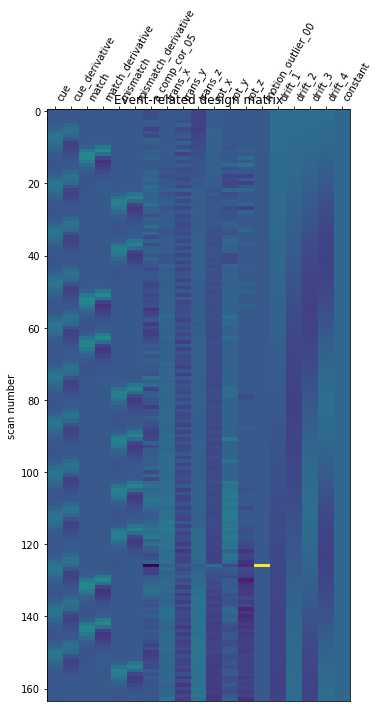

In [17]:
from nilearn.plotting import plot_design_matrix
plot_design_matrix(X1)
plt.title('Event-related design matrix', fontsize=12)

In [18]:
from nilearn.glm.first_level import FirstLevelModel

first_level_model = FirstLevelModel(t_r=tr, slice_time_ref=0)
first_level_model = first_level_model.fit(run_imgs='/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch1_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
                                    design_matrices=X1)

In [19]:
z_map = first_level_model.compute_contrast(contrasts['cue'],
                                           output_type='z_score')

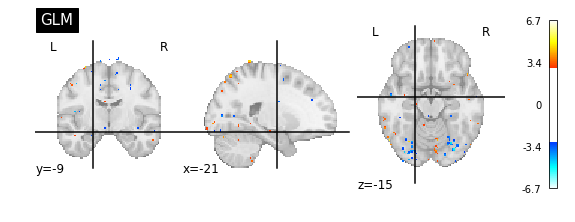

In [27]:
display = plotting.plot_stat_map(z_map, threshold=3.0, title='GLM', cut_coords=(-21, -9, -15))

## ROI

HC coordinates from Sherman (2015): 'Analyses focused on a priori defined region of the anterior hippocampus (MNI coordinates: x = -21, y = -9, z = -15) because of its importance to retrieval of relational memory (Giovanello et al., 2009) and sensitivity to prior sleep physiology (Mander et al., 2013a).'


In [11]:
hc_coords = [(-21, -9, -15)]

In [12]:
from nilearn import input_data

seed_masker = input_data.NiftiSpheresMasker(
    hc_coords, radius=8,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=1.5,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_masker = input_data.NiftiMasker(
            smoothing_fwhm=6,
            detrend=True, standardize=True,
            low_pass=0.1, high_pass=0.01, t_r=1.5,
            memory='nilearn_cache', memory_level=1, verbose=0)

runs = ['1', '2', '3']

In [13]:
selected_confounds = ['a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z', 'motion_outlier_00']

subject: 30004
run: 1
Seed time series shape: (164, 1)
Brain time series shape: (164, 1082035)


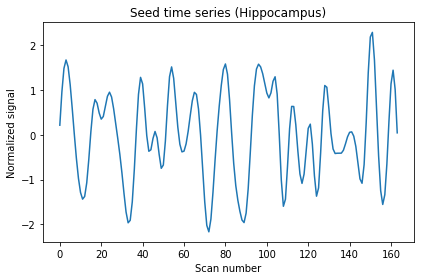

/usr/local/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


run: 2
Seed time series shape: (164, 1)
Brain time series shape: (164, 1082035)


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


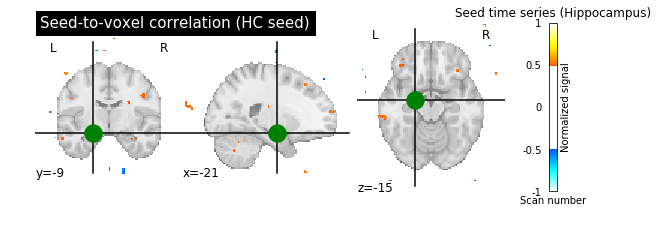

run: 3
Seed time series shape: (164, 1)
Brain time series shape: (164, 1082035)


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


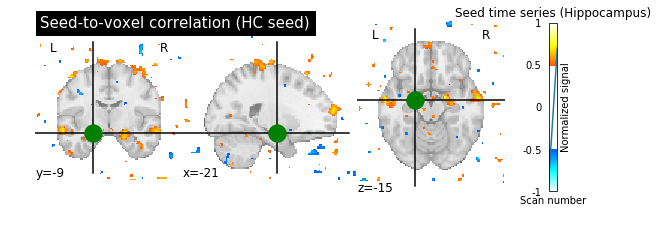

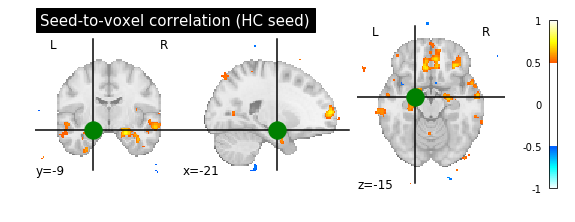

In [14]:
for subject in subjects[:1]:
    
    print('subject: %s' % subject)
    
    for run in runs:
        
        print('run: %s' % run)
        
        func_file = '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-%s/func/sub-%s_task-MemMatch%s_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (subject, subject, run)
        
        confounds_ = pd.read_csv('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-%s/func/sub-%s_task-MemMatch%s_run-01_desc-confounds_regressors.tsv' % (subject, subject, run), 
                                sep = '\t')[selected_confounds]
        
        seed_time_series = seed_masker.fit_transform(func_file, confounds=confounds_)
        
        brain_time_series = brain_masker.fit_transform(func_file, confounds=confounds_)
        
        print("Seed time series shape: (%s, %s)" % seed_time_series.shape)
        print("Brain time series shape: (%s, %s)" % brain_time_series.shape)
        
        plt.plot(seed_time_series)
        plt.title('Seed time series (Hippocampus)')
        plt.xlabel('Scan number')
        plt.ylabel('Normalized signal')
        plt.tight_layout()
        plt.show()
        
        seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0]
                              )
        
        seed_to_voxel_correlations_img = brain_masker.inverse_transform(seed_to_voxel_correlations.T)
        
        seed_to_voxel_correlations_img.to_filename('/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/sub-%s_task-MemMatch%s_seed-hc_seed_correlation.nii.gz')
        
        display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                         threshold=0.5, vmax=1,
                                         cut_coords=hc_coords[0],
                                         title="Seed-to-voxel correlation (HC seed)"
                                         )
        
        display.add_markers(marker_coords=hc_coords, marker_color='g',
                            marker_size=300)
        
        display.savefig('/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/sub-%s_task-MemMatch%s_seed-hc_seed_correlation.pdf')